In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn import preprocessing
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import Data and Organize 

In [ ]:
df = pd.read_csv("data.csv") #importing data

In [ ]:
df.isna().sum()#examine sum of nan variable

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.dropna(axis=1)#remove nan column

In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

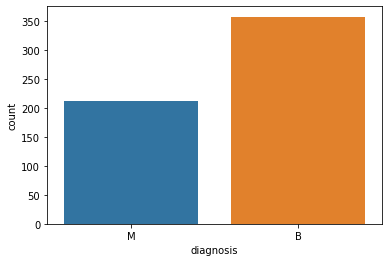

In [ ]:
sns.countplot(df['diagnosis'],label="Count")#distinguishing of data according to target value

In [ ]:
df.dtypes #check data-type

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)#the data-type of target convert to numeric

In [ ]:
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Normalize The Dataset Using Min-Max Standardization 

In [ ]:
df_data=df.drop(['id', 'diagnosis'], axis=1)
normalized_df=(df_data-df_data.min())/(df_data.max()-df_data.min())# Min-max normalization

# Feature Selection Random Forest 

In [ ]:
model = RandomForestRegressor(random_state=1, max_depth=10)#Random Forest Regressor
modelNormalized = RandomForestRegressor(random_state=1, max_depth=10)

In [ ]:
model.fit(df_data,df.diagnosis)#fitting process
modelNormalized.fit(normalized_df,df.diagnosis)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

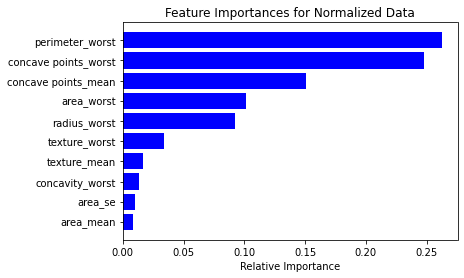

In [ ]:
features = normalized_df.columns
importances = modelNormalized.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances for Normalized Data')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

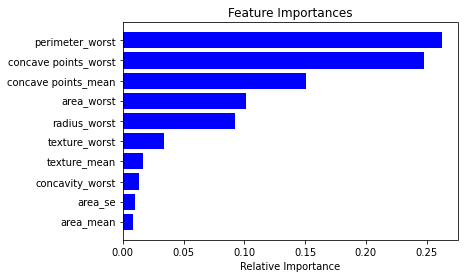

In [ ]:
features = df_data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Clustering Original Dataset k = 2 


In [ ]:
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
X=df_data.iloc[:,[27,22]].values #select 'perimeter worst' and 'concave points_worst' because there are the most important
y_kmeans = kmeans.fit_predict(X)

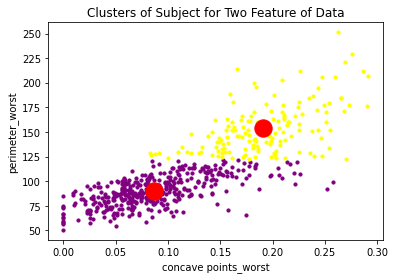

In [ ]:
plt.scatter(X[y_kmeans==0, 0],X[y_kmeans==0, 1], s=10, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=10, c='yellow', label ='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Subject for Two Feature of Data')
plt.xlabel('concave points_worst')
plt.ylabel('perimeter_worst')
plt.show()

In [ ]:
classNames = ['Benign','Malignant']
print(classification_report(df.diagnosis, y_kmeans, target_names=classNames))

              precision    recall  f1-score   support

      Benign       0.86      1.00      0.92       357
   Malignant       0.99      0.72      0.84       212

    accuracy                           0.89       569
   macro avg       0.93      0.86      0.88       569
weighted avg       0.91      0.89      0.89       569



# Clustering Normalized Dataset k = 2

In [ ]:
kmeansNormalized = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
XNormalized=normalized_df.iloc[:,[27,22]].values #select 'perimeter worst' and 'concave points_worst'
y_kmeansNormalized = kmeansNormalized.fit_predict(XNormalized)

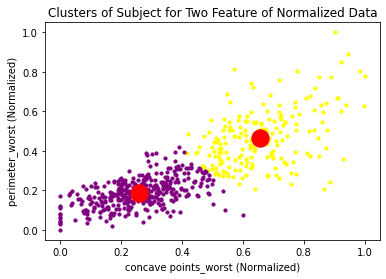

In [ ]:
plt.scatter(XNormalized[y_kmeansNormalized==0, 0],XNormalized[y_kmeansNormalized==0, 1], s=10, c='yellow', label ='Cluster 1')
plt.scatter(XNormalized[y_kmeansNormalized==1, 0], XNormalized[y_kmeansNormalized==1, 1], s=10, c='purple', label ='Cluster 2')
plt.scatter(kmeansNormalized.cluster_centers_[:, 0], kmeansNormalized.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Subject for Two Feature of Normalized Data')
plt.xlabel('concave points_worst (Normalized)')
plt.ylabel('perimeter_worst (Normalized)')
plt.show()

In [ ]:
print(classification_report(df.diagnosis, y_kmeans, target_names=classNames))

              precision    recall  f1-score   support

      Benign       0.86      1.00      0.92       357
   Malignant       0.99      0.72      0.84       212

    accuracy                           0.89       569
   macro avg       0.93      0.86      0.88       569
weighted avg       0.91      0.89      0.89       569



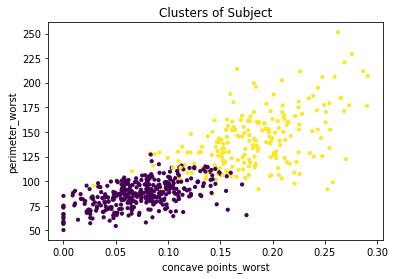

In [ ]:
plt.scatter(df.iloc[:,29].values,df.iloc[:,24].values, s=10, c=df.diagnosis)#actual target value according to 'perimeter worst' and 'concave points_worst'
plt.title('Clusters of Subject')
plt.xlabel('concave points_worst')
plt.ylabel('perimeter_worst')
plt.show()

# Dimension Reduction PCA

In [ ]:
pca = PCA(n_components=2) # create Pca model for 2 feature
X_pca = pca.fit(df_data) 
X_pca = pca.fit_transform(df_data) 
df_pca=pd.DataFrame(data=X_pca,columns=['Principal_comp'+str(i) for i in range(1,3)]) 
km_pca = KMeans(n_clusters=2,n_init=10,max_iter=500).fit(X=X_pca) # create K-means model for 2 class
preds_km_pca = km_pca.predict(X_pca)

Text(0, 0.5, 'Principal_comp2')

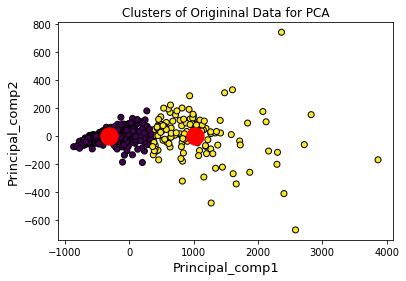

In [ ]:
pca = PCA(n_components=2) 
X_pca = pca.fit(df_data) 
X_pca = pca.fit_transform(df_data) 
df_pca=pd.DataFrame(data=X_pca,columns=['Principal_comp'+str(i) for i in range(1,3)]) 
km_pca = KMeans(n_clusters=2,n_init=10,max_iter=500).fit(X=X_pca) 
preds_km_pca = km_pca.predict(X_pca)
col_pca_combi=list(combinations(df_pca.columns,2))
num_pca_combi = len(col_pca_combi)
dim1=col_pca_combi[0][0]
dim2=col_pca_combi[0][1]
plt.title('Clusters of Origininal Data for PCA')
plt.scatter(df_pca[dim1],df_pca[dim2],c=preds_km_pca,edgecolor='k')
plt.scatter(km_pca.cluster_centers_[:, 0], km_pca.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.xlabel(f"{dim1}",fontsize=13)
plt.ylabel(f"{dim2}",fontsize=13)

In [ ]:
print(classification_report(df.diagnosis, preds_km_pca, target_names=classNames))

              precision    recall  f1-score   support

      Benign       0.81      1.00      0.90       357
   Malignant       0.99      0.61      0.76       212

    accuracy                           0.85       569
   macro avg       0.90      0.81      0.83       569
weighted avg       0.88      0.85      0.84       569



In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit(normalized_df)# fit normalized data
X_pca = pca.fit_transform(normalized_df)
df_pca=pd.DataFrame(data=X_pca,columns=['Principal_comp'+str(i) for i in range(1,3)])
km_pca = KMeans(n_clusters=2,n_init=10,max_iter=500).fit(X=X_pca)
preds_km_pca = km_pca.predict(X_pca)

Text(0, 0.5, 'Principal_comp2')

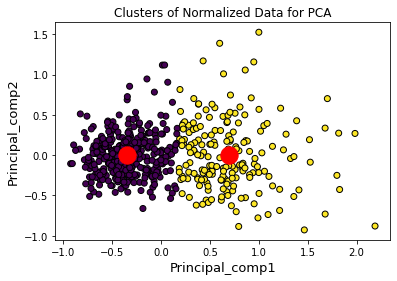

In [ ]:
col_pca_combi=list(combinations(df_pca.columns,2))
num_pca_combi = len(col_pca_combi)
dim1=col_pca_combi[0][0]
dim2=col_pca_combi[0][1]
plt.title('Clusters of Normalized Data for PCA')
plt.scatter(df_pca[dim1],df_pca[dim2],c=preds_km_pca,edgecolor='k')
plt.scatter(km_pca.cluster_centers_[:, 0], km_pca.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.xlabel(f"{dim1}",fontsize=13)
plt.ylabel(f"{dim2}",fontsize=13)

In [ ]:
print(classification_report(df.diagnosis, preds_km_pca, target_names=classNames))

              precision    recall  f1-score   support

      Benign       0.92      0.97      0.94       357
   Malignant       0.95      0.85      0.90       212

    accuracy                           0.93       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.93      0.93      0.93       569



# Split The Datasets

In [ ]:
X=df_data
y=df.diagnosis
XNormalized=normalized_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)#split 0.2 range 
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(XNormalized, y, test_size=0.20, random_state=10)

# Draw Scatter Plot to Show The Relation Between Features

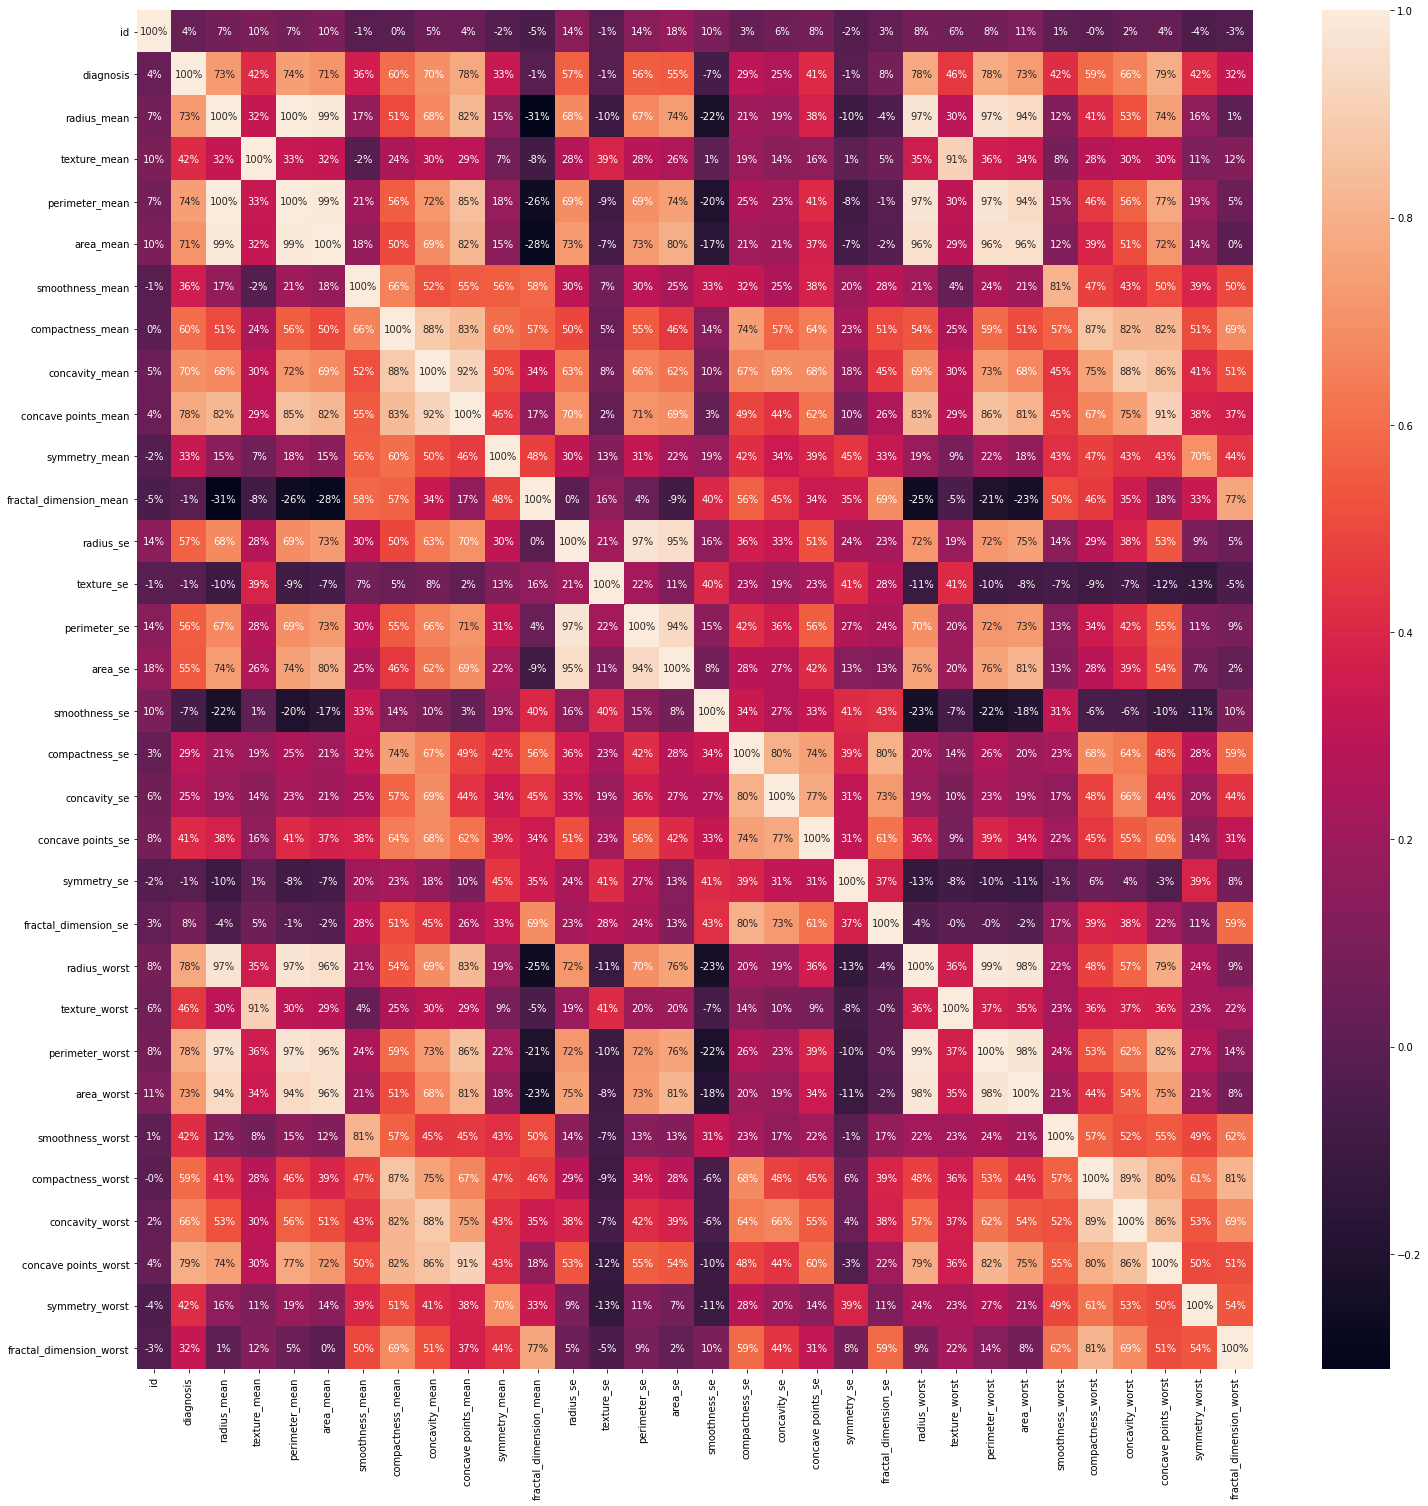

In [ ]:
plt.figure(figsize=(25,25))
corr=df.iloc[:,:].corr()
sns.heatmap(corr,annot=True,fmt='.0%')#show correlation between features

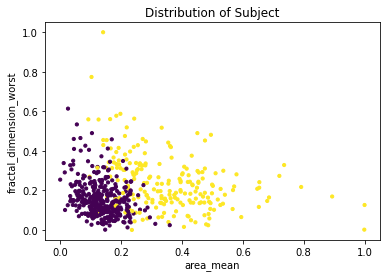

In [ ]:
plt.scatter(normalized_df.iloc[:,3].values,normalized_df.iloc[:,29].values, s=10, c=df.diagnosis)
plt.title('Distribution of Subject')
plt.xlabel('area_mean')
plt.ylabel('fractal_dimension_worst')
plt.show()

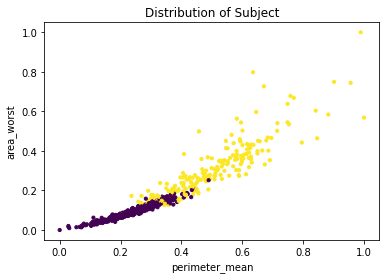

In [ ]:
plt.scatter(normalized_df.iloc[:,2].values,normalized_df.iloc[:,23].values, s=10, c=df.diagnosis)
plt.title('Distribution of Subject')
plt.xlabel('perimeter_mean')
plt.ylabel('area_worst')
plt.show()

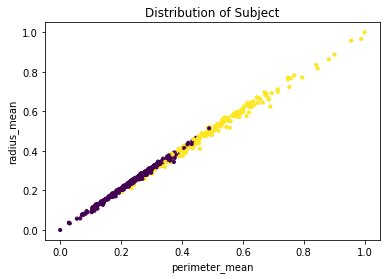

In [ ]:
plt.scatter(normalized_df.iloc[:,2].values,normalized_df.iloc[:,0].values, s=10, c=df.diagnosis)
plt.title('Distribution of Subject')
plt.xlabel('perimeter_mean')
plt.ylabel('radius_mean')
plt.show()

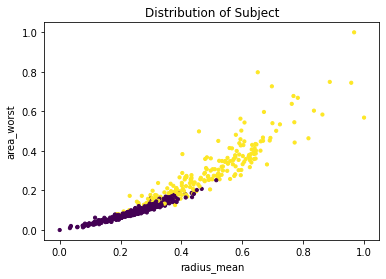

In [ ]:
plt.scatter(normalized_df.iloc[:,0].values,normalized_df.iloc[:,23].values, s=10, c=df.diagnosis)
plt.title('Distribution of Subject')
plt.xlabel('radius_mean')
plt.ylabel('area_worst')
plt.show()

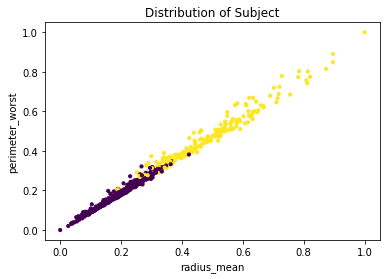

In [ ]:
plt.scatter(normalized_df.iloc[:,20].values,normalized_df.iloc[:,22].values, s=10, c=df.diagnosis)
plt.title('Distribution of Subject')
plt.xlabel('radius_mean')
plt.ylabel('perimeter_worst')
plt.show()

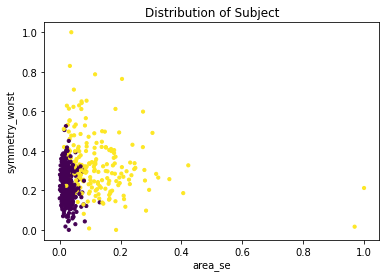

In [ ]:
plt.scatter(normalized_df.iloc[:,13].values,normalized_df.iloc[:,28].values, s=10, c=df.diagnosis)
plt.title('Distribution of Subject')
plt.xlabel('area_se')
plt.ylabel('symmetry_worst')
plt.show()

# Classify The Test Dataset and Show Result

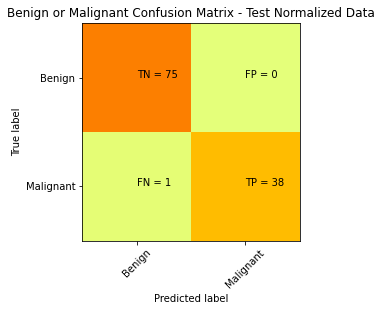

For Normalized Data Accuracy on test set : 99.12280701754386


In [ ]:
clfNormalized = SVC(kernel='linear').fit(X_train_normalized, y_train_normalized)#fit normalized data to SVM
classifier_prediction=clfNormalized.predict(X_test_normalized)
cm_test = confusion_matrix(y_test_normalized, classifier_prediction)
plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benign','Malignant']
plt.title('Benign or Malignant Confusion Matrix - Test Normalized Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]))
plt.show()
print("For Normalized Data Accuracy on test set : "+str(accuracy_score(y_test_normalized,classifier_prediction)*100))

In [ ]:
print(classification_report(y_test_normalized, classifier_prediction, target_names=classNames))

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99        75
   Malignant       1.00      0.97      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



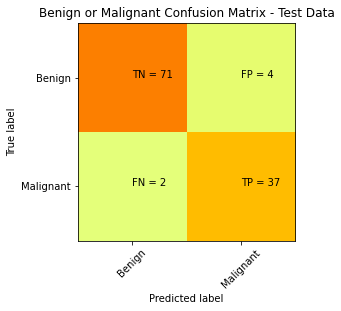

Accuracy on test set : 94.73684210526315


In [ ]:
clf = SVC(kernel='linear').fit(X_train, y_train)#fit original data to SVM
classifier_prediction=clf.predict(X_test)
cm_test = confusion_matrix(y_test, classifier_prediction)
plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benign','Malignant']
plt.title('Benign or Malignant Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]))
plt.show()
print("Accuracy on test set : "+str(accuracy_score(y_test,classifier_prediction)*100))

In [ ]:
print(classification_report(y_test_normalized, classifier_prediction, target_names=classNames))

              precision    recall  f1-score   support

      Benign       0.97      0.95      0.96        75
   Malignant       0.90      0.95      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
dfReductionThreeFeature=normalized_df[['perimeter_worst', 'concave points_worst', 'concave points_mean']]#select the most important three feature from normalized data
X_train_Rdcnormalized, X_test_Rdcnormalized, y_train_Rdcnormalized, y_test_Rdcnormalized = train_test_split(dfReductionThreeFeature, y, test_size=0.20, random_state=10)

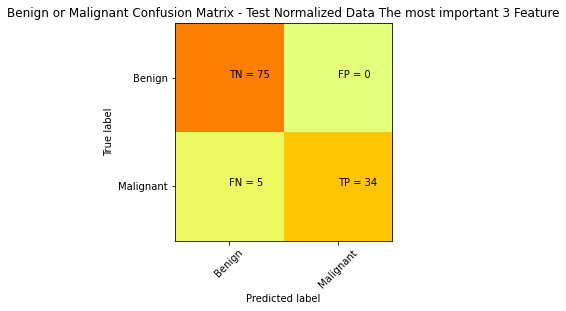

For Normalized Data Accuracy on test set : 95.6140350877193


In [ ]:
clfNormalized = SVC(kernel='linear').fit(X_train_Rdcnormalized, y_train_Rdcnormalized)
classifier_prediction=clfNormalized.predict(X_test_Rdcnormalized)
cm_test = confusion_matrix(y_test_Rdcnormalized, classifier_prediction)
plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benign','Malignant']
plt.title('Benign or Malignant Confusion Matrix - Test Normalized Data The most important 3 Feature')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]))
plt.show()
print("For Normalized Data Accuracy on test set : "+str(accuracy_score(y_test_Rdcnormalized,classifier_prediction)*100))

In [ ]:
print(classification_report(y_test_normalized, classifier_prediction, target_names=classNames))

              precision    recall  f1-score   support

      Benign       0.94      1.00      0.97        75
   Malignant       1.00      0.87      0.93        39

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
dfReductionTenFeature=normalized_df[['perimeter_worst', 'concave points_worst', 'concave points_mean',
       'area_worst', 'radius_worst', 'texture_worst', 'texture_mean',
       'concavity_worst', 'area_se', 'area_mean']]#select the most important ten feature from normalized data
X_train_Rdcnormalized, X_test_Rdcnormalized, y_train_Rdcnormalized, y_test_Rdcnormalized = train_test_split(dfReductionTenFeature, y, test_size=0.20, random_state=10)

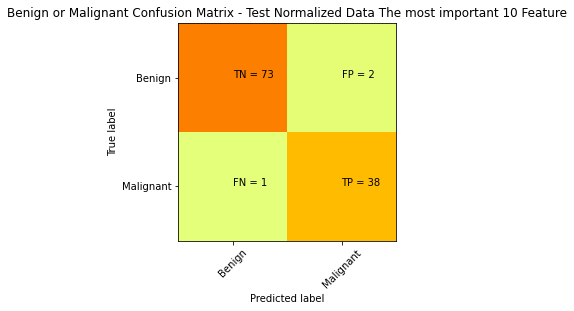

For Normalized Data Accuracy on test set : 97.36842105263158


In [ ]:
clfNormalized = SVC(kernel='linear').fit(X_train_Rdcnormalized, y_train_Rdcnormalized)
classifier_prediction=clfNormalized.predict(X_test_Rdcnormalized)
cm_test = confusion_matrix(y_test_Rdcnormalized, classifier_prediction)
plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benign','Malignant']
plt.title('Benign or Malignant Confusion Matrix - Test Normalized Data The most important 10 Feature')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]))
plt.show()
print("For Normalized Data Accuracy on test set : "+str(accuracy_score(y_test_Rdcnormalized,classifier_prediction)*100))

In [ ]:
print(classification_report(y_test_normalized, classifier_prediction, target_names=classNames))

              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98        75
   Malignant       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
#select feature according to correlation
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[i] and columns[j]:
                if corr.columns[i] in features[indices]:
                    if corr.columns[j] in features[indices]:
                        continue
                    else:
                        columns[j] = False
                else:
                    columns[i] = False
selected_columns = df.columns[columns]
data = df[selected_columns]
data = data.drop(['id', 'diagnosis'], axis=1)
normalized_data_correlation = (data-data.min())/(data.max()-data.min())

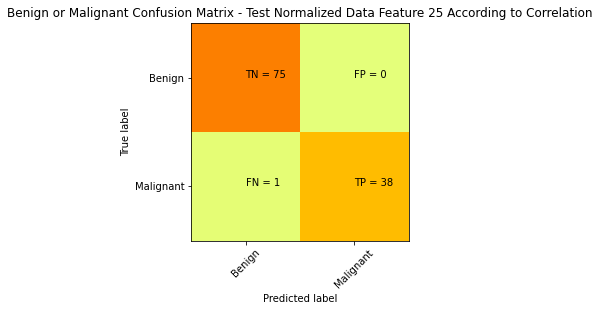

For Normalized Data Accuracy on test set : 99.12280701754386


In [ ]:
X_train_normalized_correlation, X_test_normalized_correlation, y_train_normalized_correlation, y_test_normalized_correlation = train_test_split(normalized_data_correlation, y, test_size=0.20, random_state=10)
clf = SVC(kernel='linear').fit(X_train_normalized_correlation, y_train_normalized_correlation)
classifier_prediction=clf.predict(X_test_normalized_correlation)
cm_test = confusion_matrix(y_test_normalized_correlation, classifier_prediction)
plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benign','Malignant']
plt.title('Benign or Malignant Confusion Matrix - Test Normalized Data Feature 25 According to Correlation')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]))
plt.show()
print("For Normalized Data Accuracy on test set : "+str(accuracy_score(y_test_normalized_correlation,classifier_prediction)*100))

In [ ]:
normalized_data_correlation.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
print(classification_report(y_test_normalized, classifier_prediction, target_names=classNames))

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99        75
   Malignant       1.00      0.97      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



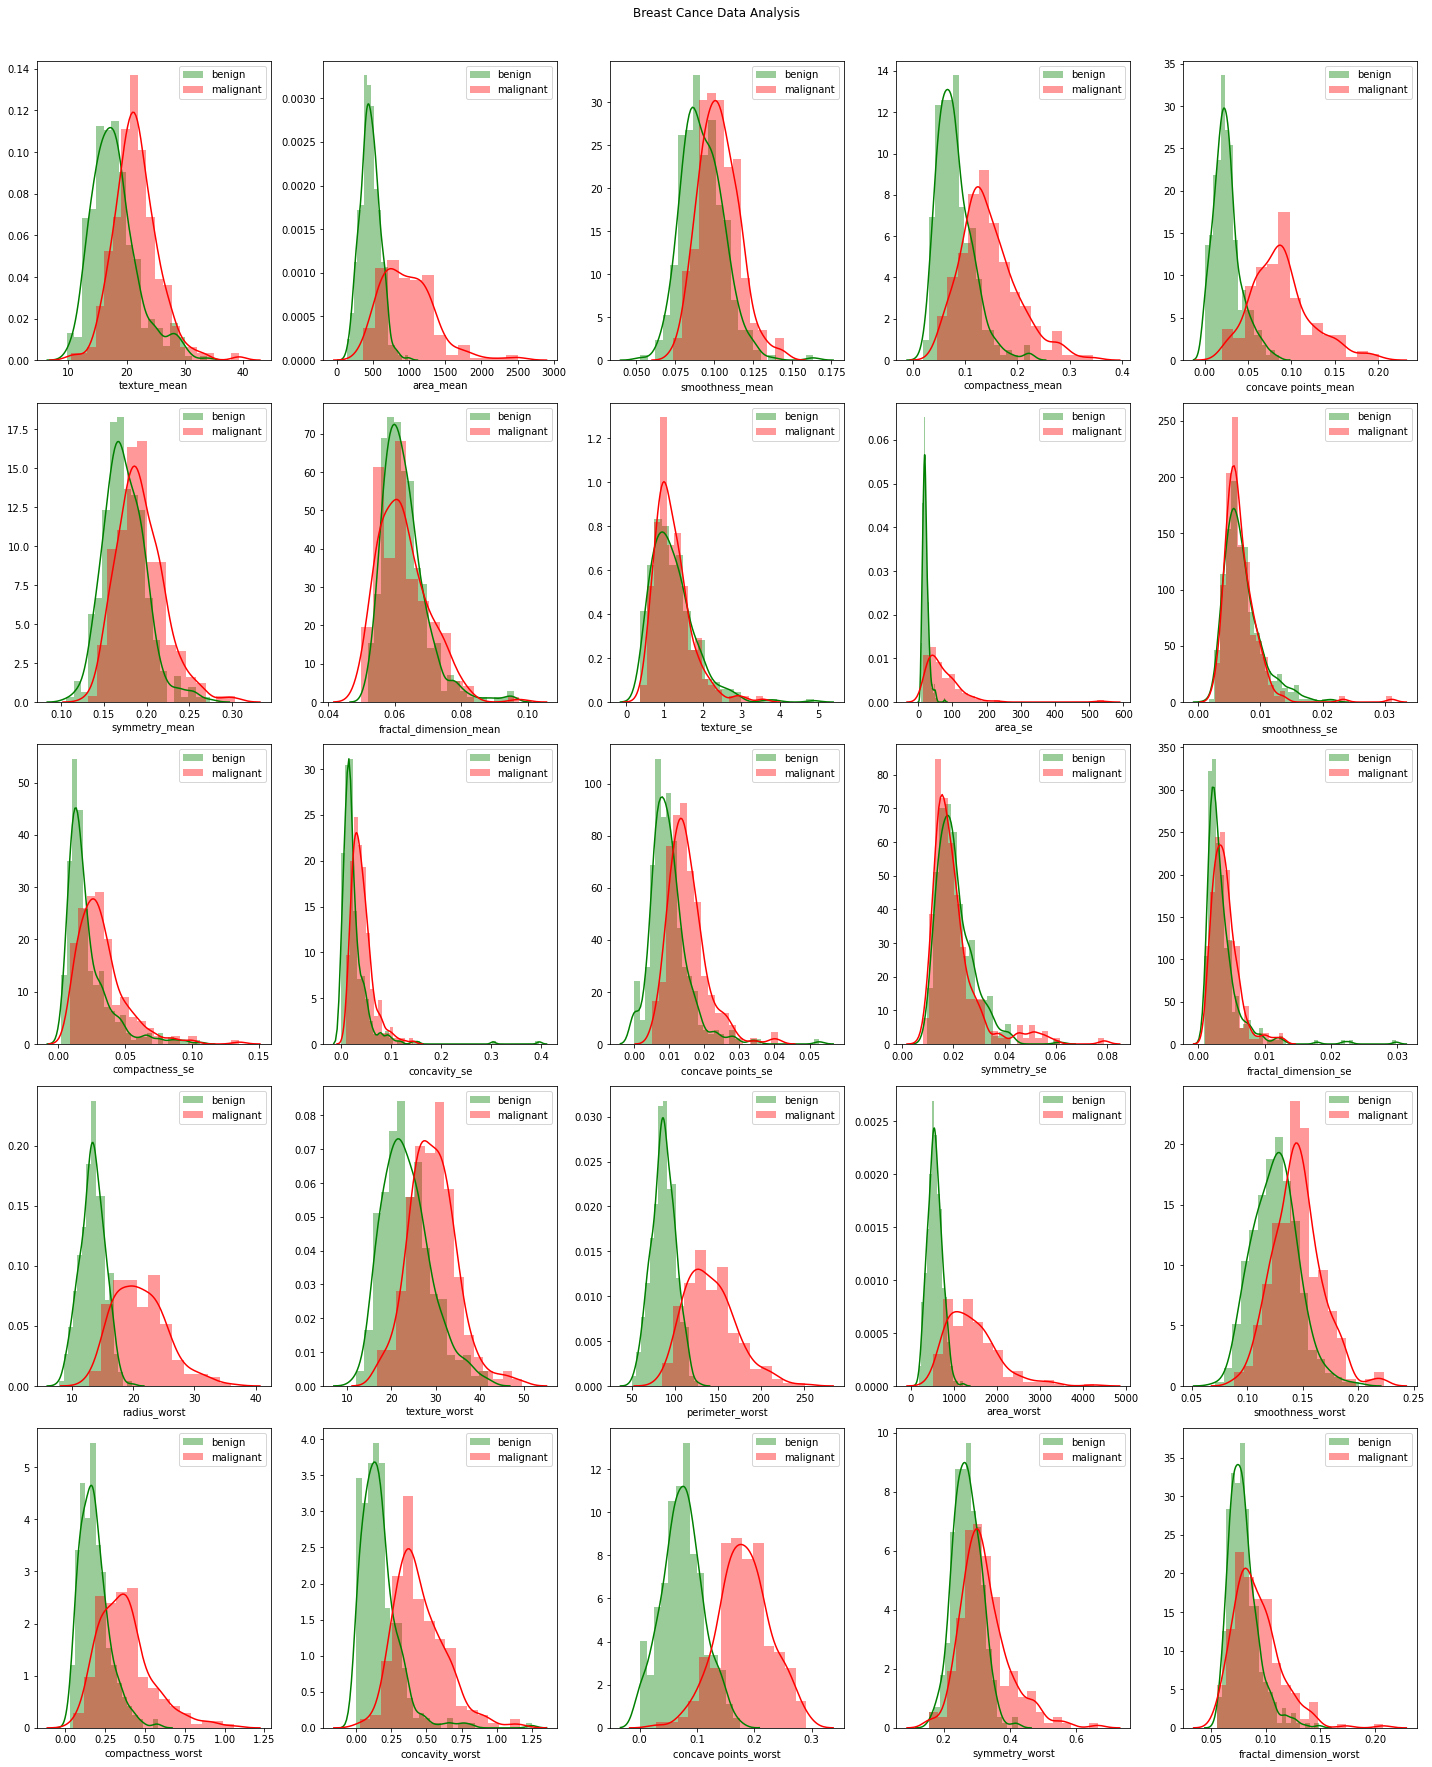

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in normalized_data_correlation.columns:
    plt.subplot(5, 5, j+1)
    j += 1
    sns.distplot(data[i][df['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][df['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
fig = px.scatter_3d(df, x='perimeter_worst', y='concave points_worst', z='concave points_mean',
              color='diagnosis')
fig.show()# show the data according to the most important feature